# Gammas of Ar41
In this notebook, we aim to analyse the energy of gammas from Ar41 de-excitation.

## Simulation
1. We simulate `1M` neutrons in LAr volume (cylinder wt `radius=2m` and `height=4m`) with sensitive volume *Argon* and *FiberCore*.
1. We selected only the `9874` events wt Ar41 entries. 

In [4]:
import pandas as pd, numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [8]:
dirin = os.path.join("..", "..", "Data", "neutrons")
filein = "ExportAr41_SPSCylinder_FiberCoreEnabled_part1.csv"
# Load data into DataFrame
df = pd.read_csv(os.path.join(dirin, filein), index_col=False)
df = df[df.columns[:-1]]             # remove last empty col
df["r"] = (df.x**2 + df.y**2)**.5    # X-Y radius

print("[Info] Loaded {} events ({} entries)".format(df.eventnumber.nunique(), len(df)))

[Info] Loaded 9874 events (3281754 entries)


## Energy of gammas from Ar41 de-excitation
First, we check the energy of gammas. 
We expect to see high-energy gammas, then we plot their energy at the first entry.

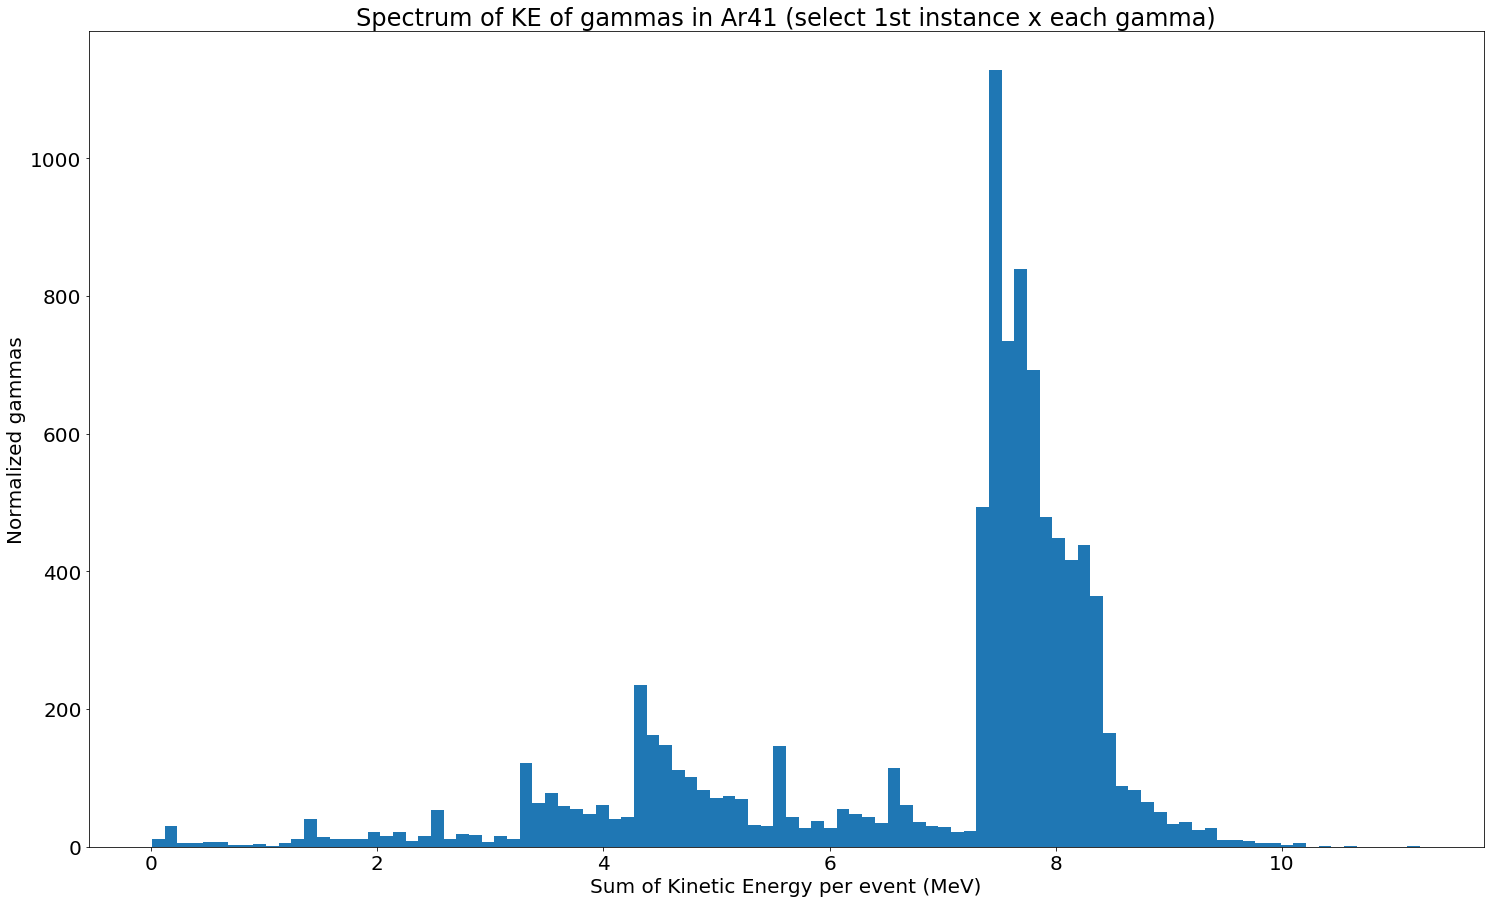

In [6]:
# For each gamma (PID==22) in an event (identified by event nr + track nr)
# select only the 1st recorded entry (the 1st written after its creation)
first_gammas = df[df.PID==22].groupby(["eventnumber", "tracknumber"]).first()
# Plot the cumulative energy of gammas for each event
plt.hist(first_gammas.groupby("eventnumber").kineticenergy.sum(), bins=100)
plt.xlabel("Sum of Kinetic Energy per event (MeV)")
plt.ylabel("Normalized gammas")
plt.title("Spectrum of KE of gammas in Ar41 (select 1st instance x each gamma)")
plt.show()

## Energy of gammas on fibers
We expect to see these high-energy gammas also on the fibers. Then, we filter the entries with *FiberCore* as sensitive volume to see the amount of energy that reach the fibers.

In [10]:
gamma_fibers = df[(df.PID==22) & (df.sensitiveVolID!=201)]
first_gamma_fibers = gamma_fibers.groupby(["eventnumber", "tracknumber"]).first().reset_index()

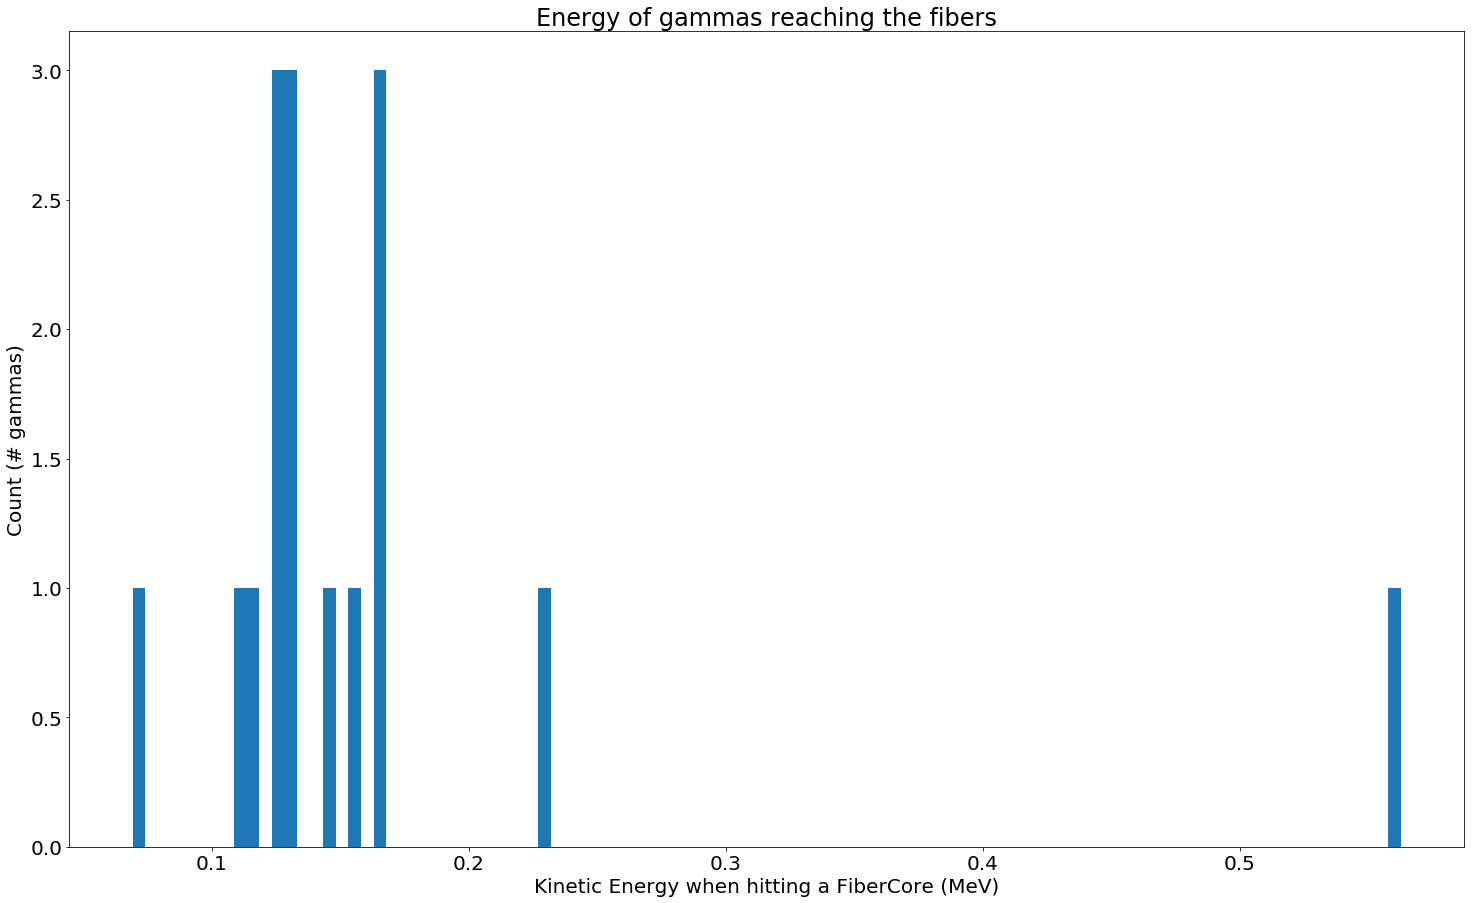

In [13]:
plt.hist(first_gamma_fibers.kineticenergy, bins=100)
plt.xlabel("Kinetic Energy when hitting a FiberCore (MeV)")
plt.ylabel("Count (# gammas)")
plt.title("Energy of gammas reaching the fibers")
plt.show()

# Question:
1. **Why only ~20 gammas** reach the fibers? Are them too far from ROI or loose their energy along the path?

# Track a gamma before the fibers
We track the gamma track `25` of event `17152`.

In [30]:
df[(df.PID==22) & (df.creatorprocess=="nCapture") & (df.kineticenergy>4) & (df.r>250)].sort_values("r")

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,sensitiveVolID,r
260742,22,6,0.0,4.103391,3.957653e+04,-242.863275,62.968000,-296.048775,82569,14,nCapture,201,250.893482
2603098,22,1,0.0,4.105455,7.841228e+02,-106.733178,228.479657,-1046.288520,798836,24,nCapture,201,252.180342
1878015,22,1,0.0,4.103512,5.130402e+05,145.481119,-206.017246,-697.705039,578084,27,nCapture,201,252.205991
2249514,22,1,0.0,4.101084,5.641101e+01,-21.826267,-252.987978,-1406.916259,692257,5,nCapture,201,253.927751
3139752,22,1,0.0,4.101678,6.847152e+02,-250.149463,-47.544756,3.298845,957854,18,nCapture,201,254.627684
343501,22,1,0.0,4.103024,1.981892e+03,91.170694,241.701060,-1255.419268,111758,13,nCapture,201,258.324404
2570649,22,1,0.0,4.103545,3.611372e+07,110.192465,-233.739607,1594.860804,788569,37,nCapture,201,258.411655
2130377,22,1,0.0,4.103266,1.033834e+04,-204.862719,-159.085555,-657.250825,654056,24,nCapture,201,259.378002
2822411,22,1,0.0,4.105603,7.171740e+01,-73.604391,-249.101859,-1161.901145,862297,8,nCapture,201,259.748614
2577892,22,1,0.0,4.103355,1.983899e+06,41.303692,257.063229,1434.642331,790619,26,nCapture,201,260.360325


In [36]:
selected_cols = ["PID", "energydeposition", "kineticenergy", "time", "x", "y", "z", "r", "creatorprocess"]
event755785 = df[df.eventnumber==744785]
event755785[event755785.tracknumber==34][selected_cols]

,PID,energydeposition,kineticenergy,time,x,y,z,r,creatorprocess
2426577,22,0.000000,4.103662,157911.790230,131.257643,242.084620,-741.939611,275.378888,nCapture
2426578,22,0.000015,2.555599,157911.920459,165.143542,260.587804,-747.737954,308.509957,compt
2426579,22,0.000313,0.959907,157912.467498,326.729952,277.778901,-769.867444,428.851465,compt
2426580,22,0.000249,0.741257,157912.610059,359.846847,272.805353,-743.313016,451.566732,compt
2426581,22,0.000249,0.401422,157913.228793,435.209914,175.141598,-604.787142,469.129245,compt
2426582,22,0.000015,0.185651,157913.558233,461.948446,229.192593,-526.570897,515.679757,compt
2426583,22,0.000015,0.177379,157913.684361,479.627051,233.286209,-559.744293,533.352194,compt
2426584,22,0.000015,0.151262,157913.830824,479.262902,247.316061,-601.349422,539.312677,compt
2426585,22,0.003178,0.129336,157914.174208,554.297373,221.869881,-667.074576,597.052612,compt
2426586,22,0.003178,0.112567,157914.317693,547.430173,221.941049,-709.538333,590.709424,compt


In [37]:
event755785[event755785.ParentTrackID==34][selected_cols]

,PID,energydeposition,kineticenergy,time,x,y,z,r,creatorprocess
2426590,11,0.000000,0.075321,157914.730109,560.547886,248.913281,-804.821540,613.328422,phot
2426591,11,0.002850,0.072471,157914.730159,560.544588,248.907250,-804.819247,613.322961,msc
2426592,11,0.013012,0.059459,157914.730287,560.533152,248.892912,-804.816508,613.306690,eIoni
2426593,11,0.012965,0.046494,157914.730392,560.545092,248.900273,-804.817490,613.320590,eIoni
2426594,11,0.017918,0.028576,157914.730474,560.543552,248.896917,-804.826563,613.317820,eIoni
2426595,11,0.023034,0.005542,157914.730520,560.541342,248.897151,-804.822796,613.315895,eIoni
2426596,11,0.005542,0.000000,157914.730525,560.541402,248.896912,-804.822711,613.315853,eIoni
2426597,11,0.000000,0.030200,157914.687422,551.348879,249.315069,-813.709043,605.098001,compt
2426598,11,0.000956,0.029243,157914.687437,551.348298,249.314884,-813.710343,605.097395,msc
2426599,11,0.013500,0.015743,157914.687484,551.346526,249.312537,-813.713819,605.094813,eIoni


In [38]:
event755785[event755785.ParentTrackID==34].energydeposition.sum()

3.967222703657014

In [24]:
# Point 1
event67 = df[df.eventnumber==67]
gammas67 = event67[event67.PID==22]

In [29]:
gammas67_init = gammas67.groupby("tracknumber").first()

In [33]:
fromgammas67 = event67[event67.ParentTrackID.isin(gammas67.tracknumber.unique())]

In [37]:
fromgammas67.energydeposition.sum()

7.619984850543455

In [38]:
fromgammas67.creatorprocess.unique()

array(['phot', 'msc', 'eIoni', 'compt', 'eBrem'], dtype=object)

In [44]:
gammas67[gammas67.tracknumber==7]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,sensitiveVolID,r
97,22,1,0.000000,4.101970,125.846551,857.432692,-146.901716,1331.021378,67,7,nCapture,201,869.925822
98,22,1,0.000313,1.320860,127.106599,1016.513032,-52.317204,1001.712210,67,7,compt,201,1017.858455
99,22,1,0.000015,1.240352,127.450382,1109.399537,-24.091442,967.107032,67,7,compt,201,1109.661088
100,22,1,0.003178,0.334430,127.800869,1204.815332,17.093868,951.614952,67,7,compt,201,1204.936590
101,22,1,0.000015,0.323924,127.953088,1211.331881,-26.791675,940.934439,67,7,compt,201,1211.628127
102,22,1,0.000015,0.183993,128.242062,1248.338809,-104.880350,934.789550,67,7,compt,201,1252.736872
103,22,1,0.000249,0.112679,128.634718,1138.933943,-135.039886,966.060393,67,7,compt,201,1146.911634
104,22,1,0.000015,0.094566,128.721077,1135.932377,-116.930266,947.803547,67,7,compt,201,1141.934785
105,22,1,0.000313,0.000000,128.881741,1167.957643,-86.825690,967.502759,67,7,phot,201,1171.180497


In [48]:
fromgammas67[(fromgammas67.ParentTrackID==7)].groupby("tracknumber").first()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,creatorprocess,sensitiveVolID,r
tracknumber,,,,,,,,,,,,
25,11,7,0.0,2.780796,127.106599,1016.513032,-52.317204,1001.712210,67,compt,201,1017.858455
26,11,7,0.0,0.080494,127.450382,1109.399537,-24.091442,967.107032,67,compt,201,1109.661088
27,11,7,0.0,0.902744,127.800869,1204.815332,17.093868,951.614952,67,compt,201,1204.936590
28,11,7,0.0,0.010491,127.953088,1211.331881,-26.791675,940.934439,67,compt,201,1211.628127
29,11,7,0.0,0.139917,128.242062,1248.338809,-104.880350,934.789550,67,compt,201,1252.736872
30,11,7,0.0,0.071065,128.634718,1138.933943,-135.039886,966.060393,67,compt,201,1146.911634
31,11,7,0.0,0.018098,128.721077,1135.932377,-116.930266,947.803547,67,compt,201,1141.934785
32,11,7,0.0,0.094252,128.881741,1167.957643,-86.825690,967.502759,67,phot,201,1171.180497


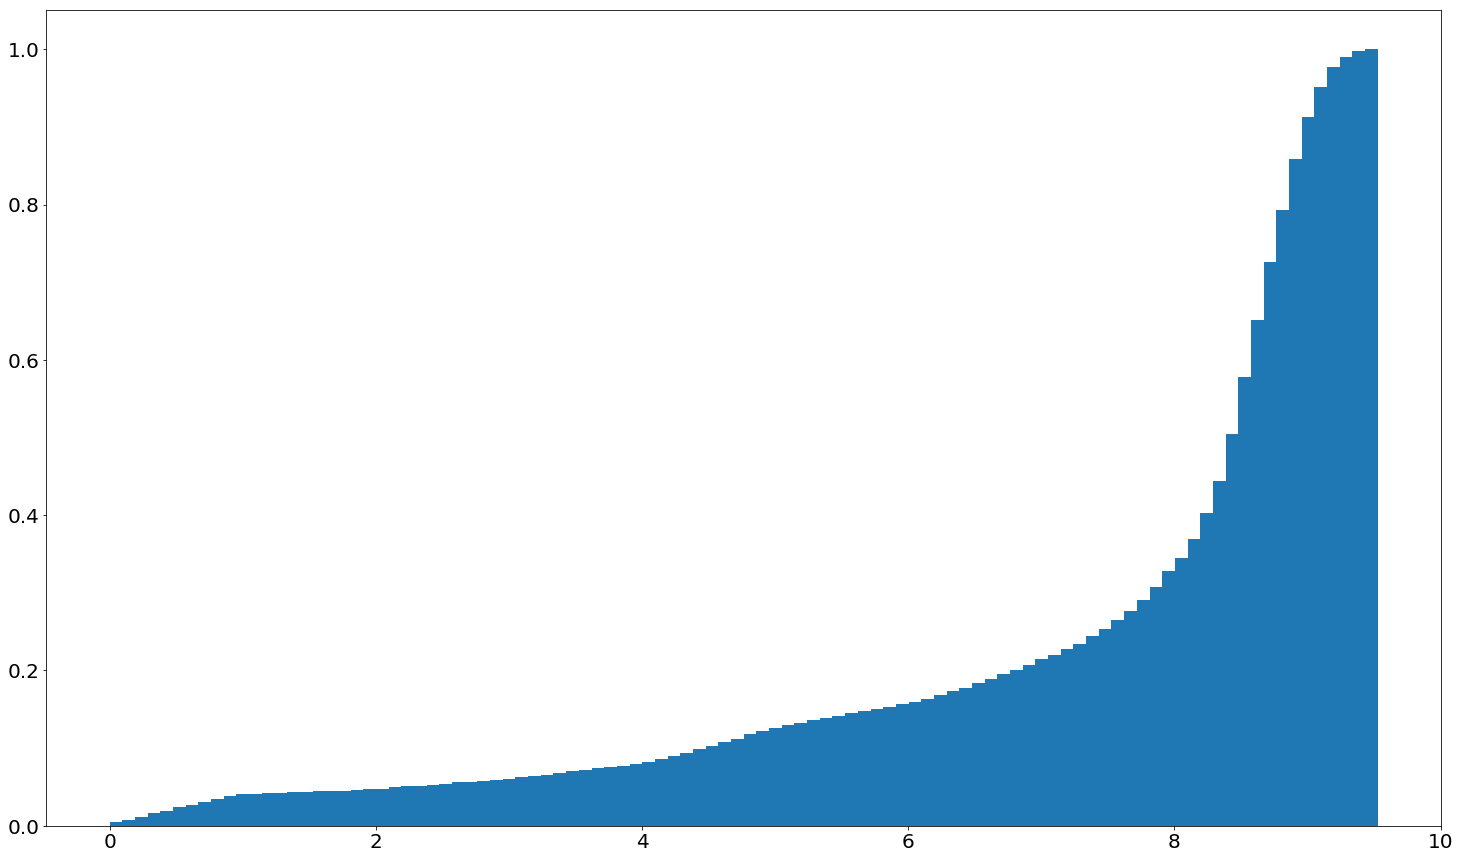

count    9874.000000
mean        7.598262
std         2.109995
min         0.000301
25%         7.494592
50%         8.471675
75%         8.796668
max         9.527376
Name: energydeposition, dtype: float64

In [42]:
plt.hist(df.groupby("eventnumber").energydeposition.sum(), bins=100, density=True, cumulative=True)
plt.show()
df.groupby("eventnumber").energydeposition.sum().describe()

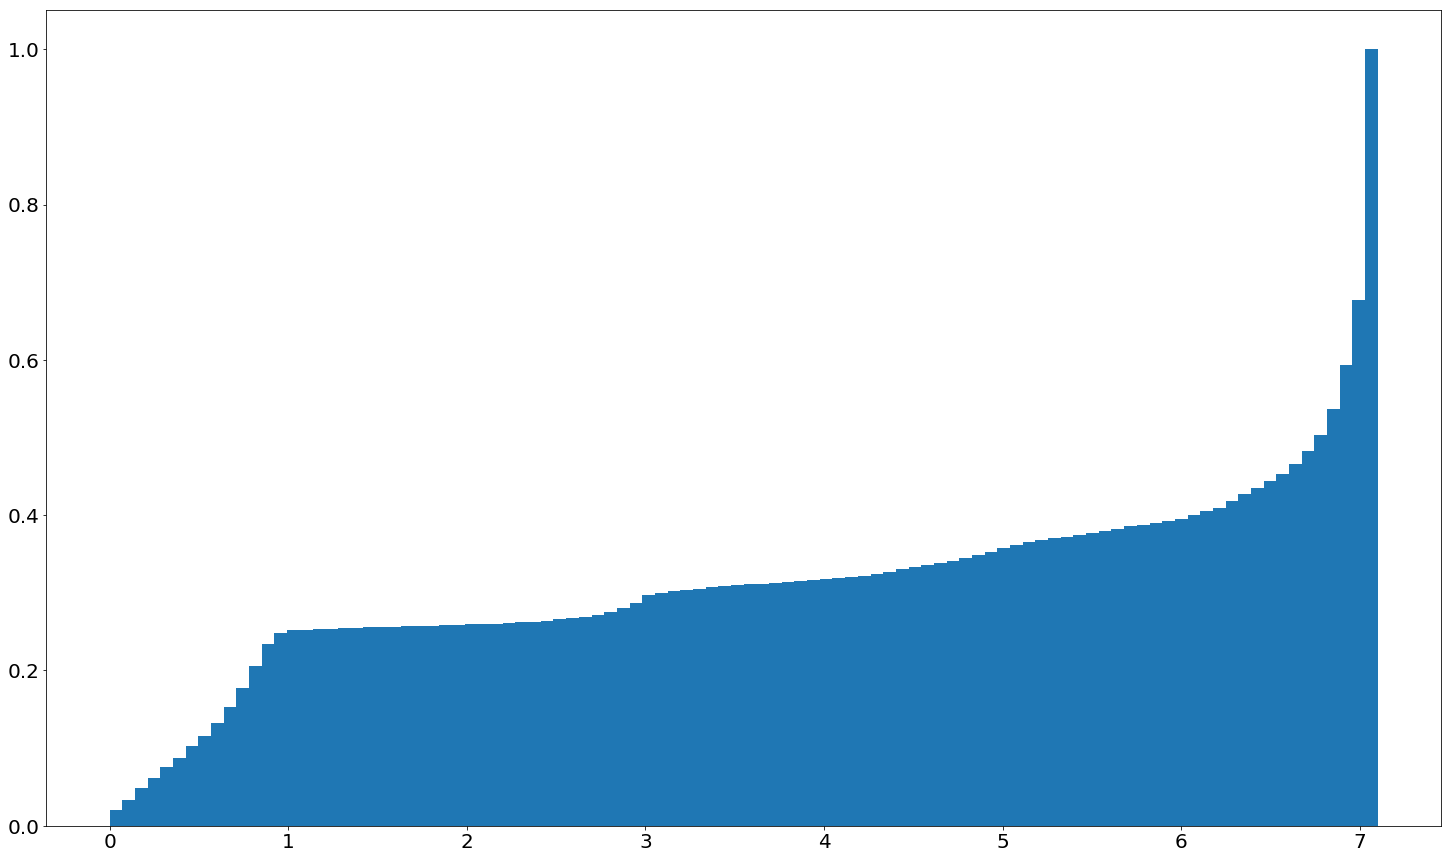

count    9874.000000
mean        4.920431
std         2.770041
min         0.000000
25%         1.000234
50%         6.804166
75%         7.069520
max         7.100407
Name: energydeposition, dtype: float64

In [52]:
df10us = df[df.time<=10000]
plt.hist(df10us.groupby("eventnumber").energydeposition.sum(), bins=100, cumulative=True, density=True)
plt.show()

df10us.groupby("eventnumber").energydeposition.sum().describe()

# Looking Detections

In [ ]:
file_detections = "SlicedDetections_SPSCylinder_FiberCoreEnabled_Slices72_Yield40_QuantumEff0.400000_Seed123456789"
det = pd.read_csv(os.path.join(dirin, file_detections))